In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [2]:
data_path = "../data/raw/DataSet.csv"
df = pd.read_csv(data_path)

df.head()


,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [3]:
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (17880, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17880 non-null  object
 6   requirements         15191 non-null  object
 7   benefits             10684 non-null  object
 8   telecommuting        17880 non-null  object
 9   has_company_logo     17880 non-null  object
 10  has_questions        17880 non-null  object
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425

In [4]:
df['fraudulent'].value_counts()


f    17014
t      866
Name: fraudulent, dtype: int64

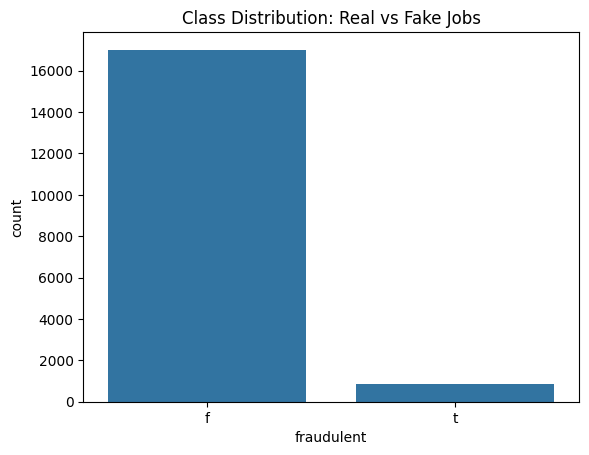

In [5]:
sns.countplot(x='fraudulent', data=df)
plt.title("Class Distribution: Real vs Fake Jobs")
plt.show()


In [6]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values


salary_range           15012
department             11547
required_education      8105
benefits                7196
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2689
location                 346
title                      0
fraudulent                 0
has_company_logo           0
has_questions              0
telecommuting              0
description                0
in_balanced_dataset        0
dtype: int64

In [7]:
missing_percentage = (missing_values / len(df)) * 100
missing_percentage


salary_range           83.959732
department             64.580537
required_education     45.329978
benefits               40.246085
required_experience    39.429530
function               36.101790
industry               27.421700
employment_type        19.412752
company_profile        18.501119
requirements           15.039150
location                1.935123
title                   0.000000
fraudulent              0.000000
has_company_logo        0.000000
has_questions           0.000000
telecommuting           0.000000
description             0.000000
in_balanced_dataset     0.000000
dtype: float64

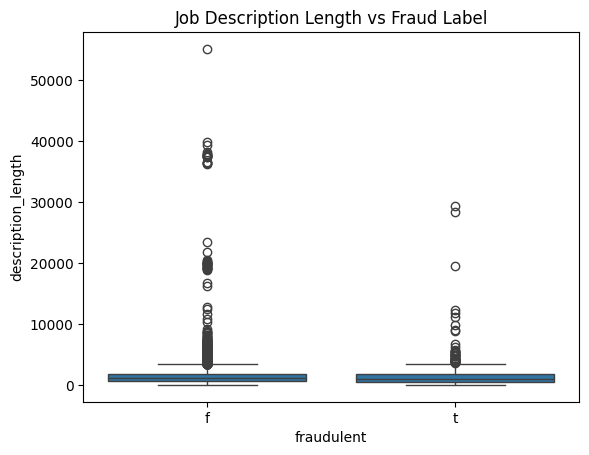

In [8]:
df['description_length'] = df['description'].fillna("").apply(len)

sns.boxplot(x='fraudulent', y='description_length', data=df)
plt.title("Job Description Length vs Fraud Label")
plt.show()


In [11]:
binary_cols = ['telecommuting', 'has_company_logo', 'has_questions']

for col in binary_cols:
    print(f"\n===== {col.upper()} =====")
    
    # Show value counts first (important for EDA)
    print("Value counts:")
    print(df[col].value_counts(dropna=False).head())
    
    # Crosstab analysis (SAFE)
    ct = pd.crosstab(df[col], df['fraudulent'], normalize='index')
    print("\nFraud ratio:")
    print(ct)



===== TELECOMMUTING =====
Value counts:
0    17113
1      767
Name: telecommuting, dtype: int64

Fraud ratio:
fraudulent            f         t
telecommuting                    
0              0.953135  0.046865
1              0.916558  0.083442

===== HAS_COMPANY_LOGO =====
Value counts:
t    14220
f     3660
Name: has_company_logo, dtype: int64

Fraud ratio:
fraudulent               f         t
has_company_logo                    
f                 0.840710  0.159290
t                 0.980098  0.019902

===== HAS_QUESTIONS =====
Value counts:
f    9088
t    8792
Name: has_questions, dtype: int64

Fraud ratio:
fraudulent            f         t
has_questions                    
f              0.932218  0.067782
t              0.971565  0.028435
